In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy import stats

In [9]:
# load dataframe
df = pd.read_csv('numerical_cleaned.csv')

In [13]:
# anonymize data
df = df.drop(['Email'], axis=1)

In [15]:
df['PFRP'] = df['Lottery Ticket Price'] + df['Borrowed Money']

In [16]:
df

,Sex,Year,Concentration,Concentration_Category,Hours spent socializing,Party Attendance,Conversation Starting,Correcting someone,Lottery Ticket Price,Borrowed Money,Reward,PFRP
0,1,2,Special Concentration,NaN,3,3,4,3,2,3,1,5
1,1,2,Mathematics,SEAS,3,2,3,3,4,2,1,6
2,2,3,Sociology,Social,3,3,4,4,3,2,3,5
3,1,2,Statistics and Computer Science,SEAS,3,5,4,2,2,3,5,5
4,2,3,OEB,SEAS,3,5,4,2,5,2,1,7
5,2,4,Psychology,Social,2,3,3,2,4,4,3,8
6,1,3,Government,Social,4,3,3,3,5,3,1,8
7,2,3,Molecular and Cellular Biology,SEAS,2,5,4,3,4,4,2,8
8,2,2,Molecular and Cellular Biology,SEAS,3,4,3,3,4,2,3,6
9,1,3,Economics,Social,2,3,2,4,4,4,2,8


## Concentration T-Tests

('ah social', Ttest_indResult(statistic=0.26531551186790159, pvalue=0.79563306676364931))
('ah seas', Ttest_indResult(statistic=0.42331299802634809, pvalue=0.68096866689908653))
('seas social', Ttest_indResult(statistic=-0.29008416266868114, pvalue=0.77259502791051216))


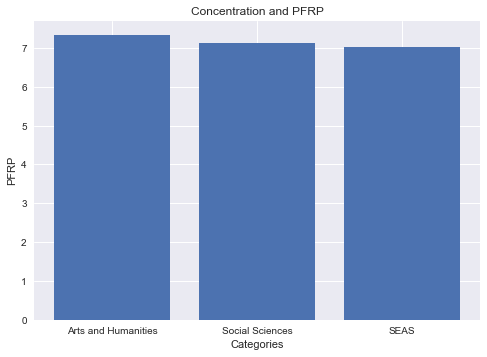

In [68]:
# PFRP
df_con = df.dropna()
seas = df_con.loc[df_con['Concentration_Category'].str.contains('SEAS')]['PFRP']
ah = df_con.loc[df_con['Concentration_Category'].str.contains('AH')]['PFRP']
social = df_con.loc[df_con['Concentration_Category'].str.contains('Social')]['PFRP']

print('ah social', stats.ttest_ind(ah, social, equal_var = False))
print('ah seas', stats.ttest_ind(ah, seas, equal_var = False))
print('seas social', stats.ttest_ind(seas, social, equal_var = False))
bars = ['Arts and Humanities', 'Social Sciences', 'SEAS']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [ah.mean(), social.mean(), seas.mean()])
plt.title('Concentration and PFRP')
plt.xlabel('Categories')
plt.ylabel('PFRP')
plt.xticks(y_pos, bars)
plt.savefig('concentration_pfrp.png', dpi = 600)
plt.show()

('ah social', Ttest_indResult(statistic=-0.94691936953198974, pvalue=0.36044728878845678))
('ah seas', Ttest_indResult(statistic=-0.78402888114507197, pvalue=0.44711234075411843))
('seas social', Ttest_indResult(statistic=-0.25312069754140321, pvalue=0.80087200105563316))


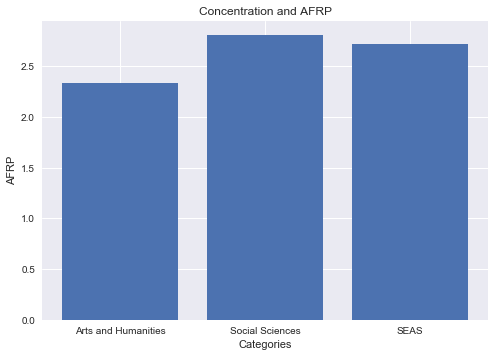

In [69]:
# AFRP i.e. Reward
df_con = df.dropna()
seas = df_con.loc[df_con['Concentration_Category'].str.contains('SEAS')]['Reward']
ah = df_con.loc[df_con['Concentration_Category'].str.contains('AH')]['Reward']
social = df_con.loc[df_con['Concentration_Category'].str.contains('Social')]['Reward']

print('ah social', stats.ttest_ind(ah, social, equal_var = False))
print('ah seas', stats.ttest_ind(ah, seas, equal_var = False))
print('seas social', stats.ttest_ind(seas, social, equal_var = False))
bars = ['Arts and Humanities', 'Social Sciences', 'SEAS']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [ah.mean(), social.mean(), seas.mean()])
plt.title('Concentration and AFRP')
plt.xlabel('Categories')
plt.ylabel('AFRP')
plt.xticks(y_pos, bars)
plt.savefig('concentration_afrp.png', dpi = 600)
plt.show()

## Gender

Ttest_indResult(statistic=-1.3983354165113024, pvalue=0.16772811311655578)


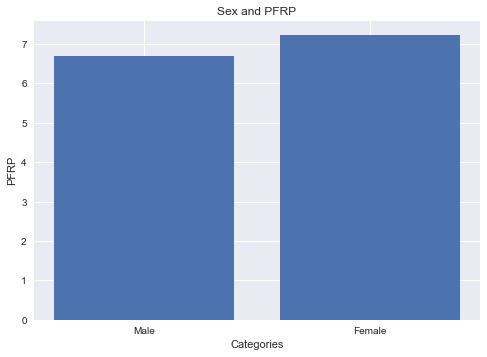

In [71]:
# PFRP
male = df.loc[df['Sex'] == 1]['PFRP']
female = df.loc[df['Sex'] == 2]['PFRP']

print(stats.ttest_ind(male, female, equal_var = False))
bars = ['Male', 'Female']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [male.mean(), female.mean()])
plt.title('Sex and PFRP')
plt.xlabel('Categories')
plt.ylabel('PFRP')
plt.xticks(y_pos, bars)
# plt.savefig('gender_pfrp.png', dpi = 600)
plt.show()

Ttest_indResult(statistic=1.2428442785357869, pvalue=0.21917292577239458)


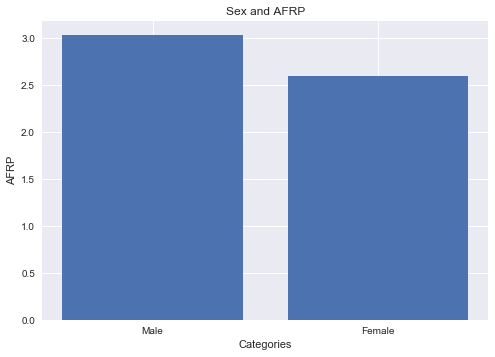

In [73]:
# PFRP
male = df.loc[df['Sex'] == 1]['Reward']
female = df.loc[df['Sex'] == 2]['Reward']

print(stats.ttest_ind(male, female, equal_var = False))
bars = ['Male', 'Female']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [male.mean(), female.mean()])
plt.title('Sex and AFRP')
plt.xlabel('Categories')
plt.ylabel('AFRP')
plt.xticks(y_pos, bars)
# plt.savefig('gender_pfrp.png', dpi = 600)
plt.show()

In [74]:
df['PRP_diff'] = df['PFRP'] - df['Reward']

Ttest_indResult(statistic=-1.765106811910387, pvalue=0.083043257468671139)


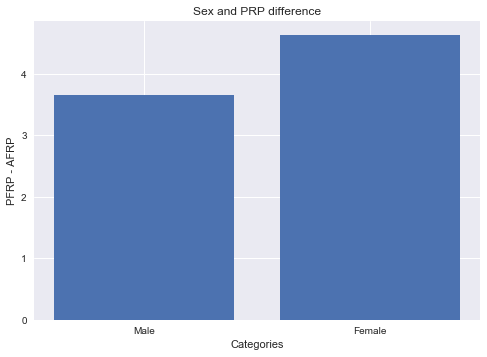

In [76]:
# Difference
male = df.loc[df['Sex'] == 1]['PRP_diff']
female = df.loc[df['Sex'] == 2]['PRP_diff']

print(stats.ttest_ind(male, female, equal_var = False))
bars = ['Male', 'Female']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [male.mean(), female.mean()])
plt.title('Sex and PRP difference')
plt.xlabel('Categories')
plt.ylabel('PFRP - AFRP')
plt.xticks(y_pos, bars)
# plt.savefig('gender_pfrp.png', dpi = 600)
plt.show()

## Year

('soph junior', Ttest_indResult(statistic=-1.1024375406810945, pvalue=0.27455694469455844))
('junior senior', Ttest_indResult(statistic=0.7315912278873492, pvalue=0.46813938101313468))
('sophomore senior', Ttest_indResult(statistic=-0.31436763634983067, pvalue=0.75473580237866322))


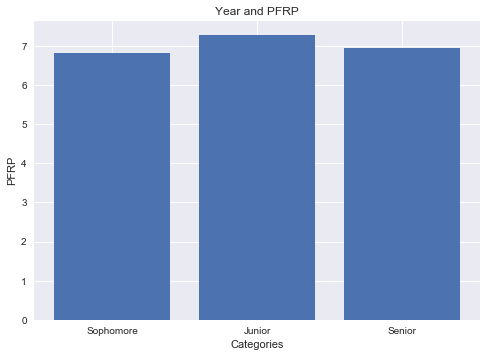

In [107]:
# PFRP
soph = df.loc[df['Year'] == 2]['PFRP']
jun = df.loc[df['Year'] == 3]['PFRP']
sen = df.loc[df['Year'] == 4]['PFRP']

print('soph junior', stats.ttest_ind(soph, jun, equal_var = False))
print('junior senior', stats.ttest_ind(jun, sen, equal_var = False))
print('sophomore senior', stats.ttest_ind(soph, sen, equal_var = False))
bars = ['Sophomore', 'Junior', 'Senior']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [soph.mean(), jun.mean(), sen.mean()])
plt.title('Year and PFRP')
plt.xlabel('Categories')
plt.ylabel('PFRP')
plt.xticks(y_pos, bars)
# plt.savefig('year_pfrp.png', dpi = 600)
plt.show()

('soph junior', Ttest_indResult(statistic=0.0, pvalue=1.0))
('junior senior', Ttest_indResult(statistic=-1.3878693086777738, pvalue=0.17339865067004231))
('sophomore senior', Ttest_indResult(statistic=-1.3129044362222384, pvalue=0.19635297225333492))


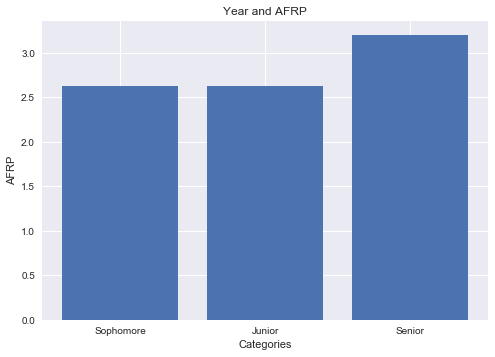

In [109]:
# PFRP
soph = df.loc[df['Year'] == 2]['Reward']
jun = df.loc[df['Year'] == 3]['Reward']
sen = df.loc[df['Year'] == 4]['Reward']

print('soph junior', stats.ttest_ind(soph, jun, equal_var = False))
print('junior senior', stats.ttest_ind(jun, sen, equal_var = False))
print('sophomore senior', stats.ttest_ind(soph, sen, equal_var = False))
bars = ['Sophomore', 'Junior', 'Senior']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [soph.mean(), jun.mean(), sen.mean()])
plt.title('Year and AFRP')
plt.xlabel('Categories')
plt.ylabel('AFRP')
plt.xticks(y_pos, bars)
# plt.savefig('year_pfrp.png', dpi = 600)
plt.show()

In [114]:
jun.mean()

2.625

In [115]:
soph.mean()

2.625